In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
URBAN_CORE_CSV = 'urban-core.csv'
ADJ_URBAN_CORE_CSV = 'Adj(urban-core).csv'
URBAN_MIX_CSV = 'urban-mix.csv'
ADJ_URBAN_MIX_CSV = 'Adj(urban-mix).csv'

In [4]:
def eda():
    data_core_csv = pd.read_csv(URBAN_CORE_CSV, header=None) 

    transposed_df = data_core_csv.transpose()

    column_averages = transposed_df[7:].mean(axis=1).reset_index(drop=True)

    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    # Plot raw dataset
    for column in transposed_df.columns[:7]:  # Exclude the X column
        ax1.plot(transposed_df.index[7:], transposed_df[column][7:], label=transposed_df[column][0])
        ax1.set_xlabel('Time Step')
        ax1.set_ylabel('Speed')
        ax1.legend()

    ax2.plot(column_averages.index, column_averages, label='Average Speed Among all Street Segment')
    ax2.set_xlabel('Time Step')
    ax2.set_ylabel('Speed')
    ax2.legend()

    plt.show()

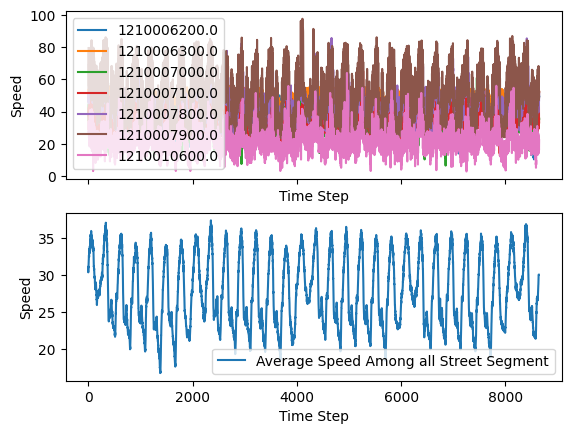

In [5]:
eda()